In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [55]:
df = pd.read_csv("ToyotaCorolla.csv").set_index("Id")

In [56]:
## Portion of dataset is selected
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [57]:
## Renaming Columns
df = df.rename({"Age_08_04": "Age", "cc" : "CC", "Quarterly_Tax" : "QT"}, axis=1)

## Exploratory Data Analysis

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 1 to 1442
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 112.2 KB


In [59]:
df.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [60]:
df.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

There are no null or na values in data.

In [61]:
## Removing duplicates
df.drop_duplicates(inplace=True)

In [63]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


#### Differentiating between discrete and continous features

In [84]:
x=[]
for feature in df.columns:
    if len(df[feature].unique())<20:
        x.append(feature)
dis = pd.DataFrame(x,columns=["Discrete features"])
df_dis = df[x]
df_dis

,HP,CC,Doors,Gears,QT
Id,,,,,
1,90,2000,3,5,210
2,90,2000,3,5,210
3,90,2000,3,5,210
4,90,2000,3,5,210
5,90,2000,3,5,210
...,...,...,...,...,...
1438,86,1300,3,5,69
1439,86,1300,3,5,69
1440,86,1300,3,5,69


In [85]:
y=[]
for feature in df.columns:
    if len(df[feature].unique())>20:
        y.append(feature)
cont = pd.DataFrame(y,columns=["Continuous features"])
df_cont = df[y]
df_cont

,Price,Age,KM,Weight
Id,,,,
1,13500,23,46986,1165
2,13750,23,72937,1165
3,13950,24,41711,1165
4,14950,26,48000,1165
5,13750,30,38500,1170
...,...,...,...,...
1438,7500,69,20544,1025
1439,10845,72,19000,1015
1440,8500,71,17016,1015


In [70]:
dis_cont = pd.concat([dis,cont],axis=1)
dis_cont

,Discrete features,Continuous features
0,HP,Price
1,CC,Age
2,Doors,KM
3,Gears,Weight
4,QT,NaN


#### Visualizing Features

C:\Users\KP\AppData\Local\Temp\ipykernel_3884\2498961876.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


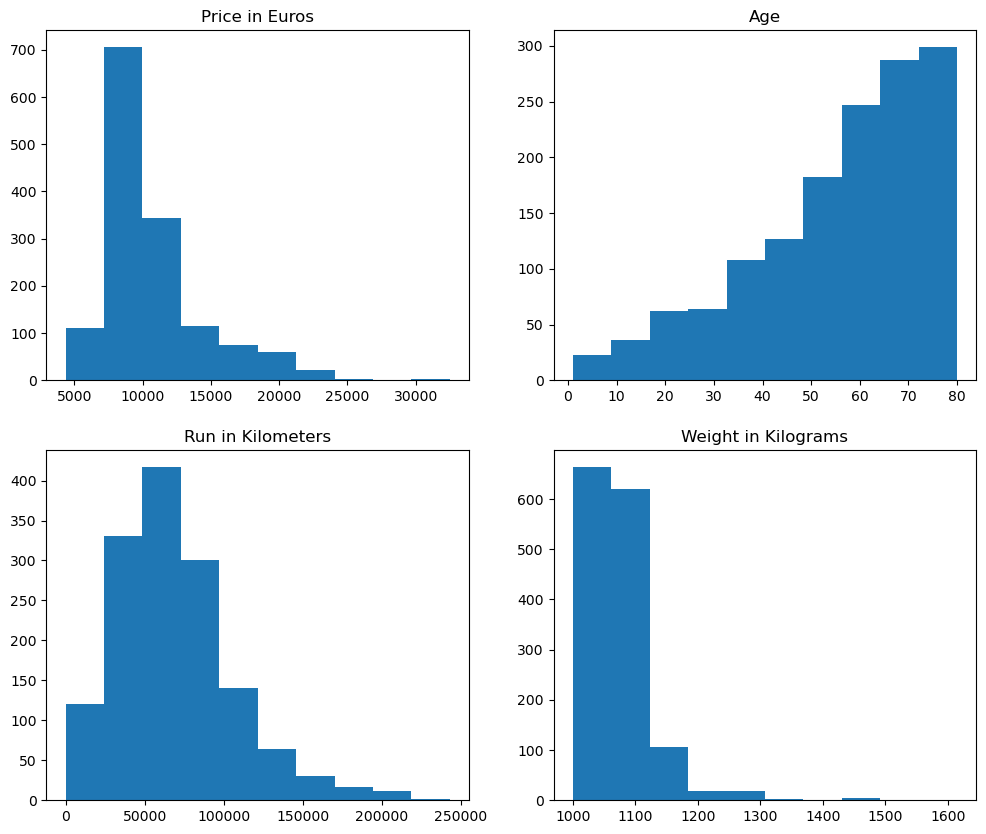

In [73]:
plt.subplots(figsize = (12,10))
plt.subplot(2,2,1)
plt.hist(df['Price'])
plt.title('Price in Euros')
plt.subplot(2,2,2)
plt.hist(df['Age'])
plt.title('Age')
plt.subplot(2,2,3)
plt.hist(df['KM'])
plt.title('Run in Kilometers')
plt.subplot(2,2,4)
plt.hist(df['Weight'])
plt.title('Weight in Kilograms')
plt.show()

C:\Users\KP\AppData\Local\Temp\ipykernel_3884\3032559530.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,1,1)


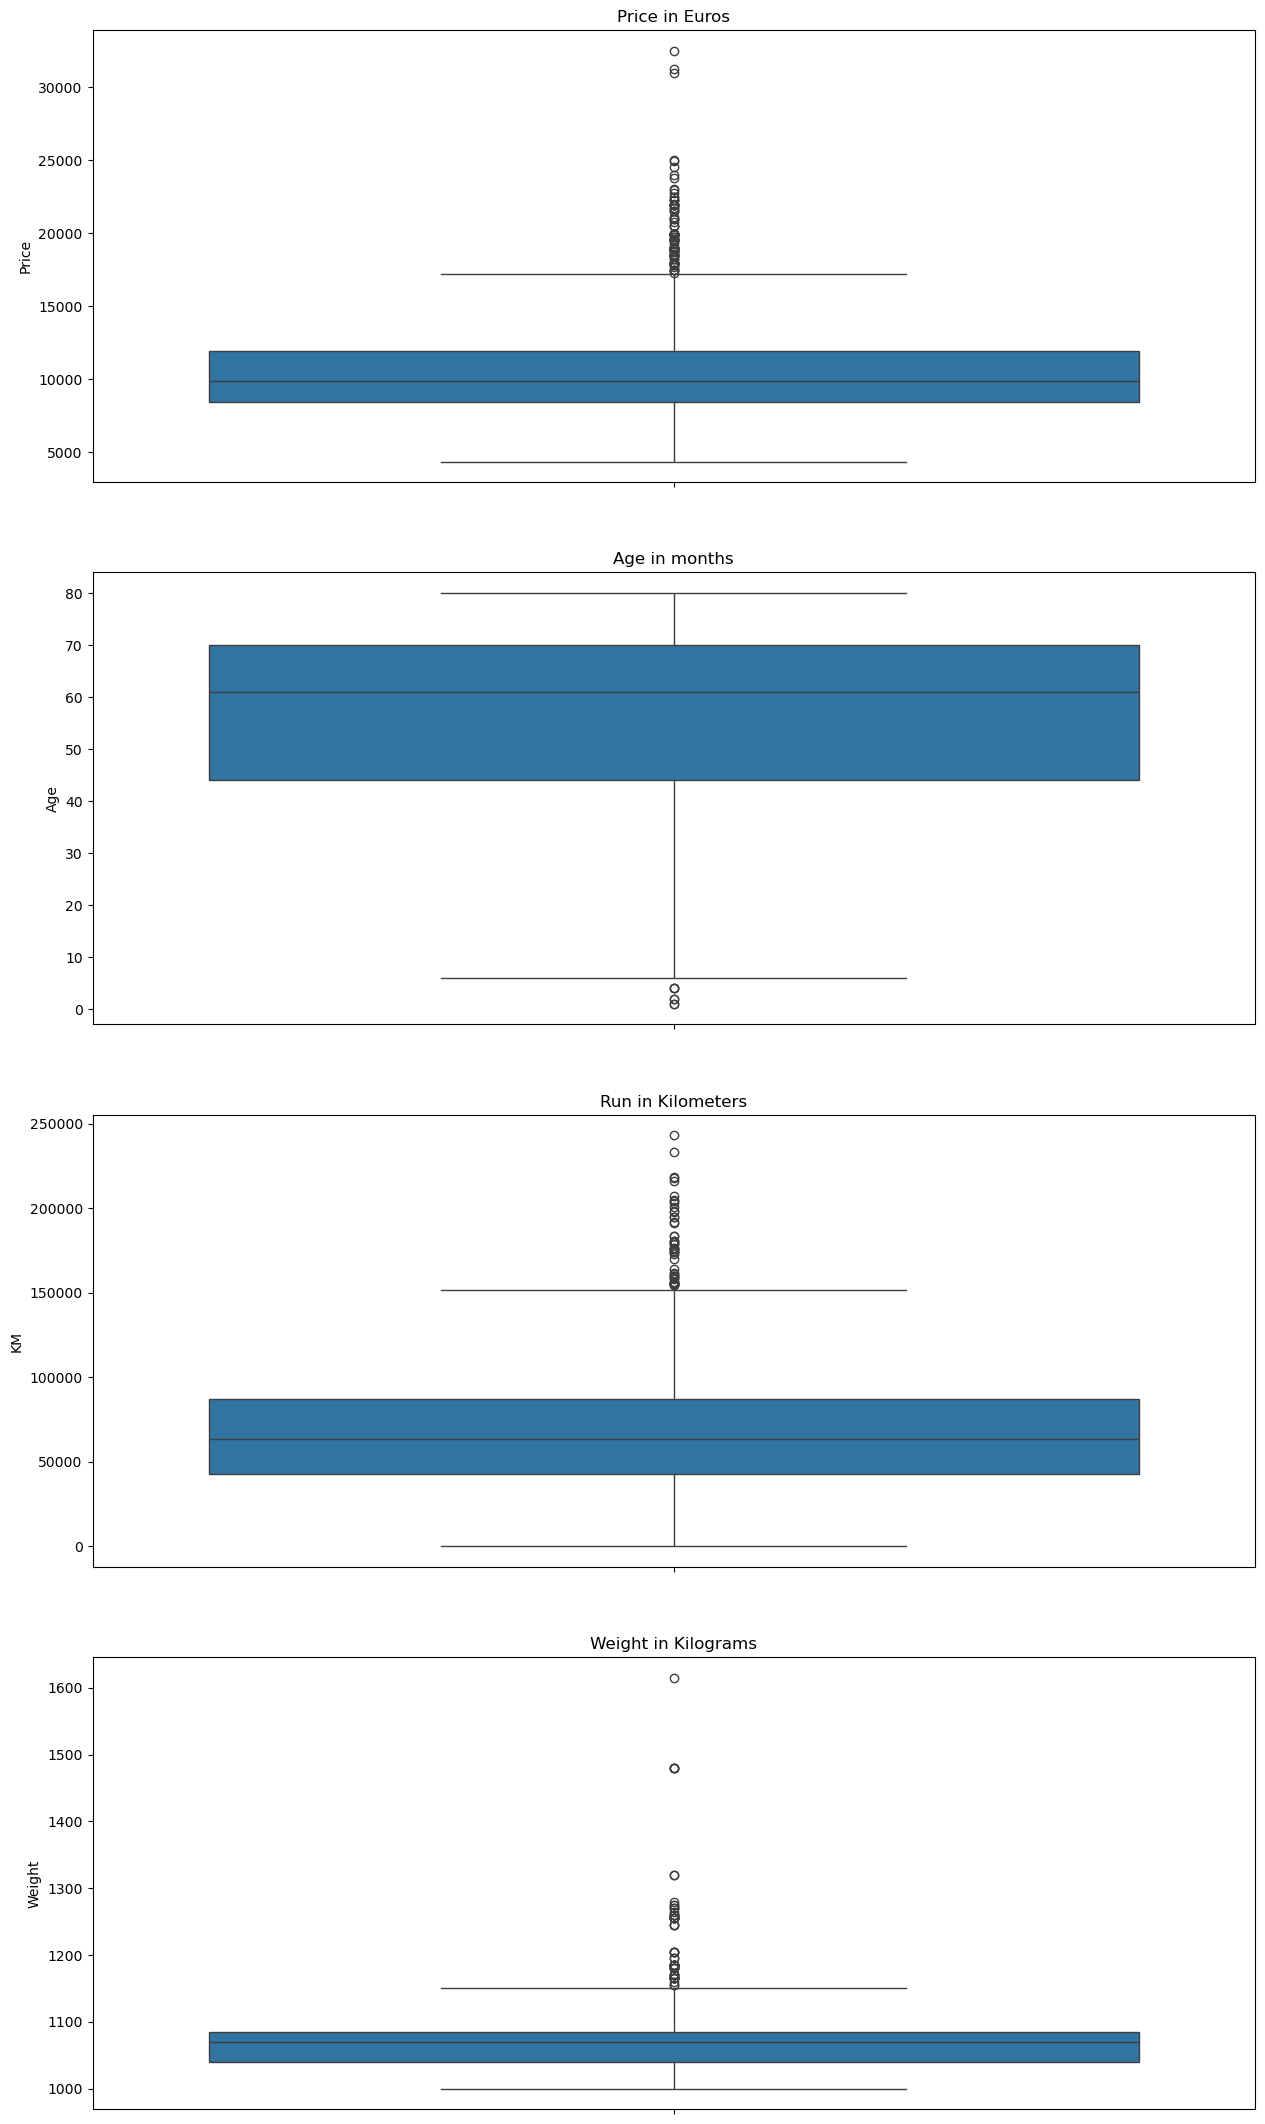

In [77]:
plt.subplots(figsize = (15,27))
plt.subplot(4,1,1)
sns.boxplot(df['Price'])
plt.title('Price in Euros')
plt.subplot(4,1,2)
sns.boxplot(df['Age'])
plt.title('Age in months')
plt.subplot(4,1,3)
sns.boxplot(df['KM'])
plt.title('Run in Kilometers')
plt.subplot(4,1,4)
sns.boxplot(df['Weight'])
plt.title('Weight in Kilograms')
plt.show()

Box Plots shows that there are outliers present in all the features.

<Axes: >

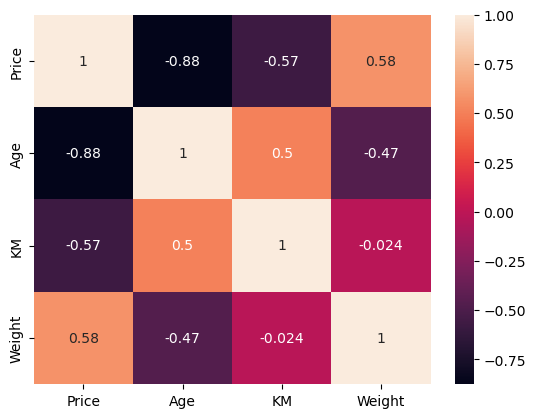

In [89]:
sns.heatmap(df_cont.corr(), annot=True)

We can see that there is strong correlation between price and age. Price is also mildly related to weight and total KM runs.

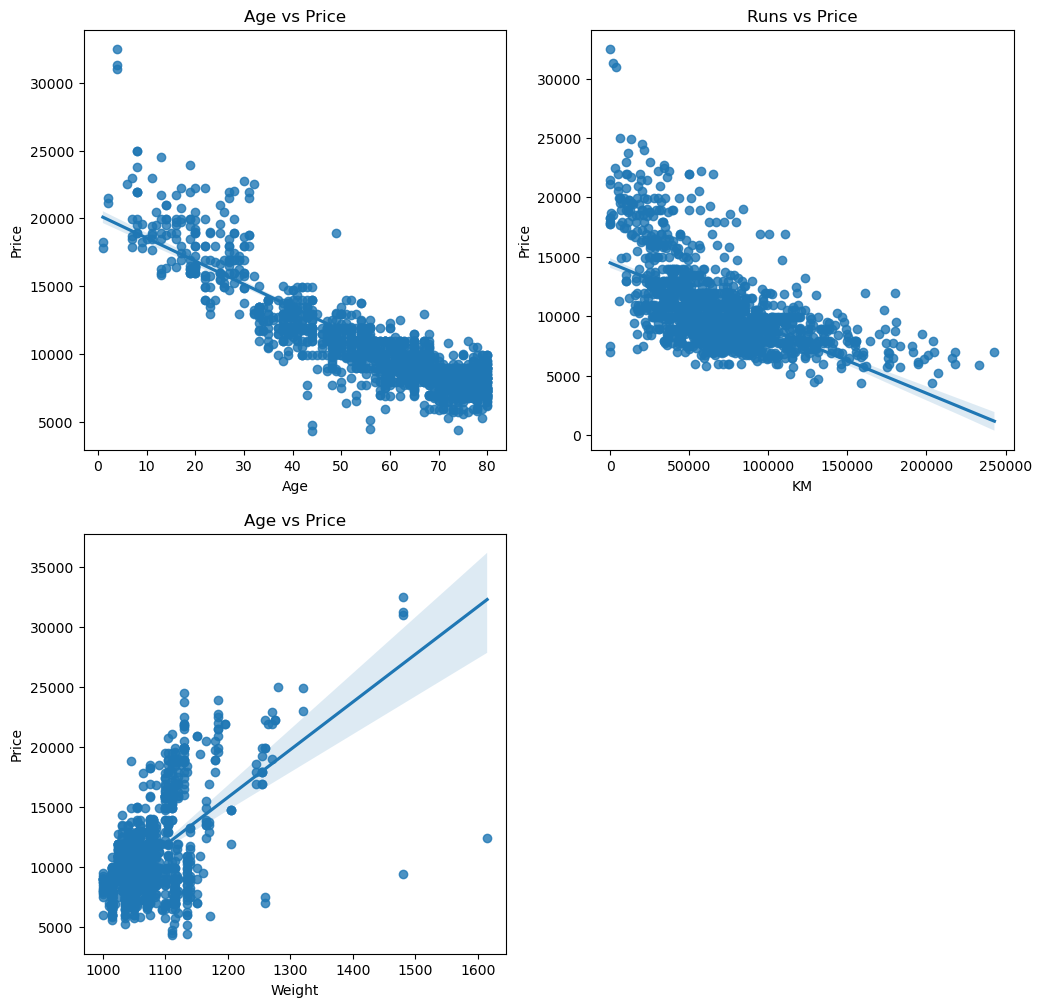

In [96]:
plt.subplots(2,2, figsize=(12,12))
plt.subplot(2,2,1)
sns.regplot(x=df['Age'], y=df['Price'])
plt.title("Age vs Price")
plt.subplot(2,2,2)
sns.regplot(x=df['KM'], y=df['Price'])
plt.title("Runs vs Price")
plt.subplot(2,2,3)
sns.regplot(x=df['Weight'], y=df['Price'])
plt.title("Age vs Price")
plt.subplot(2,2,4)
plt.axis("off")
plt.show()

C:\Users\KP\mambaforge\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


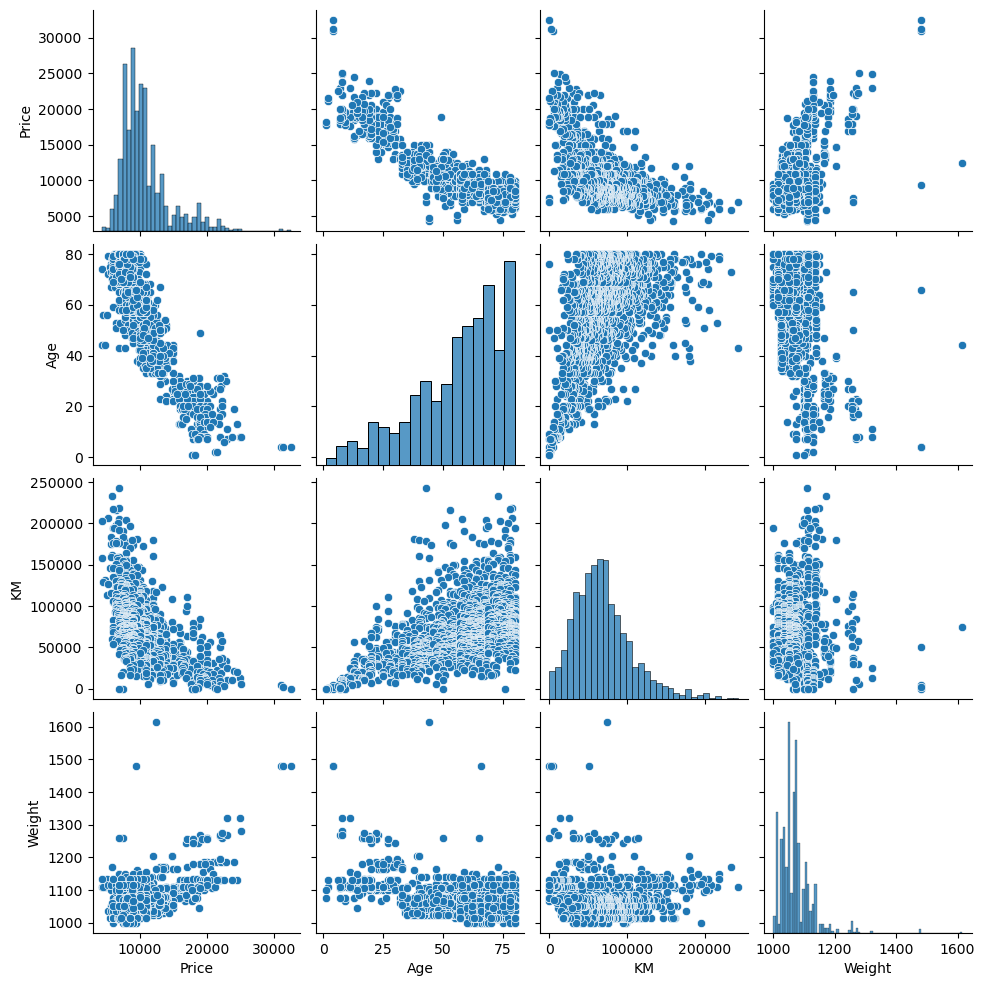

In [97]:
## Painr plot
sns.pairplot(df_cont)
plt.show()

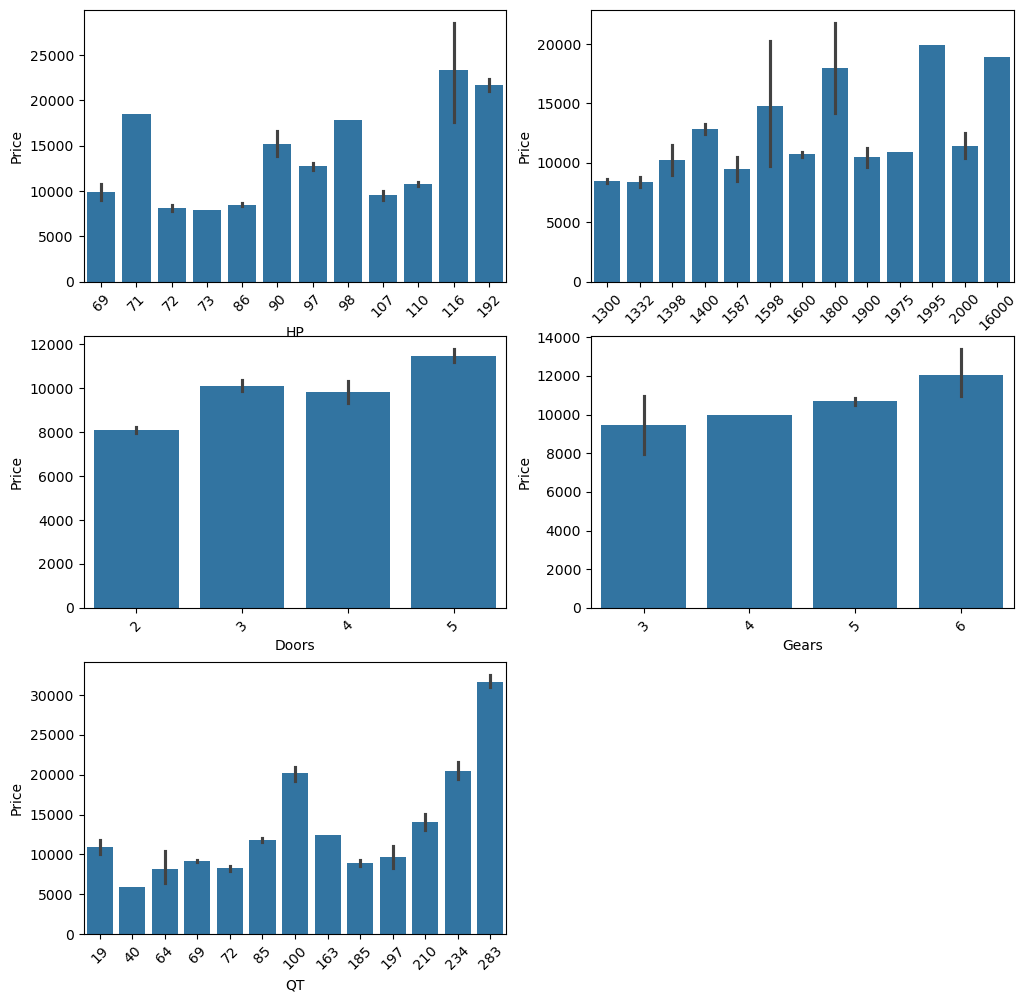

In [125]:
plt.subplots(3,2, figsize=(12,12))
for i, x in enumerate(df_dis.columns):
    plt.subplot(3,2,i+1)
    plt.xticks(rotation = 45) 
    sns.barplot(data=df,x=x,y='Price')
plt.subplot(3,2, 6).axis("off")
plt.show()

<Axes: >

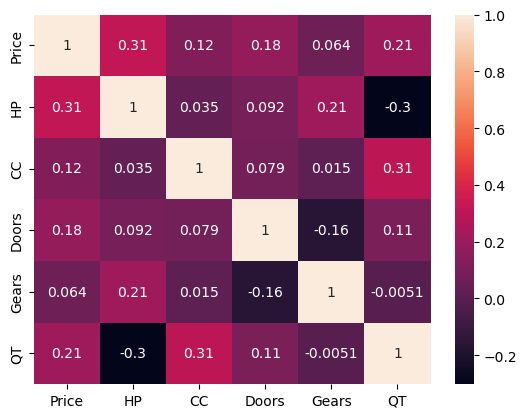

In [127]:
price_dis = pd.concat([df['Price'], df_dis], axis=1) 
sns.heatmap(price_dis.corr(), annot=True)

No discreate feature shows strong correlation with price.

## Building Model

Since continous features shows linear relation with pricing of the corolla, we will be using only those features for modeling.

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import joblib
from math import sqrt
import random

In [153]:
def regression_results(y_true, y_pred):
    mse=mean_squared_error(y_true, y_pred) 
    mae=mean_absolute_error(y_true, y_pred)
    r2=r2_score(y_true, y_pred)

    print('r2: ', round(r2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [131]:
X = df_cont.drop("Price", axis=1)
y = df["Price"]

In [134]:
seed = random.randint(1000, 10000)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.75,random_state=seed)

In [135]:
model = LinearRegression()
cont_fit = model.fit(X_train, y_train)

In [137]:
cont_pred = cont_fit.predict(X_test)

In [154]:
regression_results(y_test, cont_pred)

r2:  0.8755
MAE:  999.4099
MSE:  1933065.5847
RMSE:  1390.3473


In [167]:
print("Coefficeints and intercept\n")
for i, col in enumerate(X.columns):
    print(str(col), cont_fit.coef_[i])
print("Intercept", cont_fit.intercept_)

Coefficeints and intercept

Age -121.82102891612489
KM -0.02313001225679638
Weight 16.803320951414065
Intercept 1073.1740299113753


In [155]:
joblib.dump(cont_fit, "toyota_all.sav")

['toyota_all.sav']